| ![Logo](images/unilogo.png) |
|----------------------------------------------------------------------------|
| University of Greifswald physics department |

NMR Spectroscopy Lab
===============================================
Authored by: [Nathan Belmore](https://plasma.physics.berkeley.edu/faculty-staff/nathan-belmore) 
In partnership with Tobias Tubandt

Published: 9.1.2019


# Abstract
***
For this experiment we are measuring the the spin-lattice constant $T_1$ using the inversion-recovery method and the spin-sping lattice constant $T_2$ using the spin-echo method. Using a multi-echo-sequence developed by Carr and Purcell and improved by Meiboom and Gill we take additional measurements of $T_2$. Lastly, we examine the chemical transition of flourine. 

# Physical Principles
***
Rotating charged particles have a magnetic moment $\vec{\mu}$. A measurable shift in the energy of the magnetic moment can be seen when using an applied external magnetic field, due to the orientation of the dipole in the magnetic field. 

$$E=-\vec{\mu} \cdot \vec{B_0} = -|\vec{\mu}| \cdot |\vec{B_0}|\cos \theta$$

| ![NMR Splitting](images/fig1.png) |
|----------------------------------------------------------------------------|
| Fig. 1 Energy levels of Zeeman splitting. [1] |

We can quantify the energy from the two extrema as follows: 

$$E_{\pm}= \pm \frac{1}{2} \hbar \gamma |\vec{B_0}|$$

where $\gamma$ is the gyromagnetic ratio. We can related the energy state to the resonance frequency by looking at the different of the two energy levels. 

$$\omega_0 = \frac{E_+ - E_-}{\hbar} = \gamma B_0$$

This frequency is describing the resonance between the nucleus and the external B-field. These energies can be described as a thermodynamic two state system. The population of the energy states ($N_2$ and $N_1$) can then be explained with a Boltzmann distribution.

$$\frac{N_2(E_-)}{N_1(E_+)}= \exp(\frac{\hbar \omega_0}{kT})$$

$T$ is the temperature and $k$ the Boltzmann constant. The magnetic field in z direction can be described through $M_z$. When applying a magnetic field on $\frac{1}{2}$ particles the magnetization can be described through the differential:

$$M_z = \mu (N_2 - N_1)$$

$$\frac{dM_z}{dt} = \frac{M_0 - M_z}{T_1}$$

| ![Precession](images/fig1.png) |
|----------------------------------------------------------------------------|
| Fig. 2 Precession of the two energy orientations. [1] |

$T_1$ is the so called spin lattice relaxation time. The differential equation can be solved with the initial condition $M_z(t=0)= 0$.

$$M_z = M_0(1- \exp(-\frac{t}{T_1}))$$

where $M_0$ is used as a saturation value.


# Experimental Procedure
***
While applying an external field in the Z-direction, we want to rotate the magnetization in the $xy$ plane by applying a high frequency magnetic field $B_1$.


$$\vec{B_1}= B_1\cos (\omega_0 t)\vec{e_x} + B_1\sin (\omega_0 t)\vec{e_y}$$


While $B_1$ is rotating at or near the resonance frequency $\omega_0$, over time the magnetization will shift from the $z$ direction into the $xy$ plane. Switching the magnetic field off will result in a slow return to the into the initial orientation in $z$ direction. Shifting the orientation to the xy-plane will be defined as a $90^\circ$ pulse. The magnetic moments of the nuclear spins are interacting with each other. So over time we get a static distribution of the spins that are canceling each other out. The decrease of the magnetization over time can be described through the differential equation:


$$\frac{dM_{xy}(t)}{dt} = -\frac{M_{xy}(t)}{T_2}$$


where $T_2$ is the Spin-Spin relaxation time and $M_{xy}$ the magnetization in the xy plane. The change in magnetization over time is measured with a coil through the change in the magnetic flux density. For the experiment we use a coil, which is placed perpendicular to $B_0$ in the $xy$ plane. We can use this current to measure the spin orientation and therefor the relaxation time. 

# Execution and Setup
***
We are using the Pulsed/CW NMR Spectrometer from the company Teachspin. The spectrometer is designed for experiments for students. The setup consists of 3 main components: a permanent magnet, the PS2 Controller and the Mainframe with Four Electronic Modules.

| ![Apparatus](images/fig3.jpg) |
|----------------------------------------------------------------------------|
| Fig. 3 Teachspin NMR experimental apparatus. [1] |

### Determining the Spin-Lattice-Relaxation Time
We are using a method developed by Meiboom and Gill, starting with a pulse of $90^{\circ}$ followed by a delay $\tau$, then by a $180^{\circ}$ pulse. We collect the data using an oscilloscope. Another method is the Inversion-Recovery-Method. With a $180^\circ$ pulse to inverse the z direction of the magnetization and using another pulse of $90^\circ$ with the delay $\tau_1$. By variation of $\tau_1$ we can determine the exponential function $M_z(t)$.

### Determining the Spin-Spin-Relaxation Time
The measurement of $T_2$ is done with the spin echo method. We use a $90^\circ$ pulse and after the delay $\tau$ a $180^\circ$ pulse. The $180^\circ$ pulse is mirroring the spin directions on the $xy$ plane. Here the maximum occurs when the spin orientation passes through the xy-plane as read by the coils, which decays back to the initial state over time. By varying $\tau$, $T_2$ can be measured.

For the multi-pulse measurements we again measure $T_2$ but using the improved version of the the above method, developed by Meiboom and Gill, starting with a pulse of $90^{\circ}$ followed by $N$ $180^{\circ}$ pulses in the interval of $\tau$.

### Determining the Spin-Spin-Relaxation Time
In the last part we want to measure the chemical shift of fluoride. We are using the samples FC-60 and FC-770. At the spectrometer we are setting the resonance frequency and the shift can be determined with the fourier spectrum of the oscilloscope.

# Analysis
***



In [38]:
# creating the correct enviroment for analysis
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import argrelextrema
import scipy.fftpack
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

### Importing the data

Some of the data sets contain multiple iterations, which are summed over to improve the statistics. 

In [39]:
# path to the data set
path = 'data/'

# some data structure for genetrating a list of the files. 
files = []

for file in os.listdir(path):
    if file.endswith(".CSV"):
        files.append(os.path.join(path, file))
files.sort()
print('Files imported:')
print(files)

# Importing the data in a pandas dataframe

# # Dataset 7   
data1 = pd.read_csv(files[0], header=1, names=['time', 'ch2', 'ch3'])
data2 = pd.read_csv(files[1], header=1, names=['time', 'ch2', 'ch3'])
data3 = pd.read_csv(files[2], header=1, names=['time', 'ch2', 'ch3'])
data4 = pd.read_csv(files[3], header=1, names=['time', 'ch2', 'ch3'])
data5 = pd.read_csv(files[4], header=1, names=['time', 'ch3'])
data6 = pd.read_csv(files[5], header=1, names=['time', 'ch3'])

Files imported:
['data/AA01.CSV', 'data/AA02.CSV', 'data/AA03.CSV', 'data/AA04.CSV', 'data/AA05.CSV', 'data/AA06.CSV']


### 3.2 Single Pulse Method

We calibrated the pulse duration; $4.5 \mu s$ for 90 degree pulse, $10.6 \mu s$ for 180 degree pulse. We calibrated the frequency using the gradient field generator. As can be seen below, the signal from ch2 isn't oscillating, which indicates the sample is in resonance. 

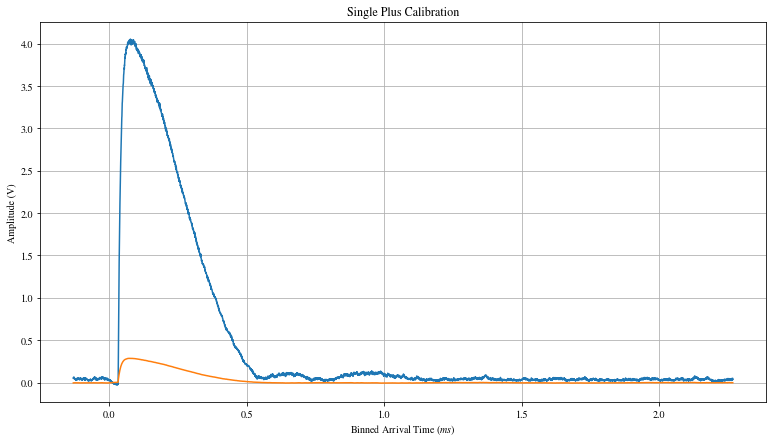

In [40]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(data1['time'].values * 1000, data1['ch2'].values)
ax.plot(data1['time'].values * 1000, data1['ch3'].values)

ax.set_xlabel('Binned Arrival Time ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.set_title('Single Plus Calibration') 
ax.grid(True)

plt.show()

Once calibrated, we applied a $90$ pulse, waited $t_p$, and applied $180$ degree pulse, and measured the amplitude of the measured signal. We used the resulting data to calculate the time constant $T_1$ using the following relationship:

$$M_z(t) = M_0 (1 - 2 e^{-\frac{t}{T_1}})$$

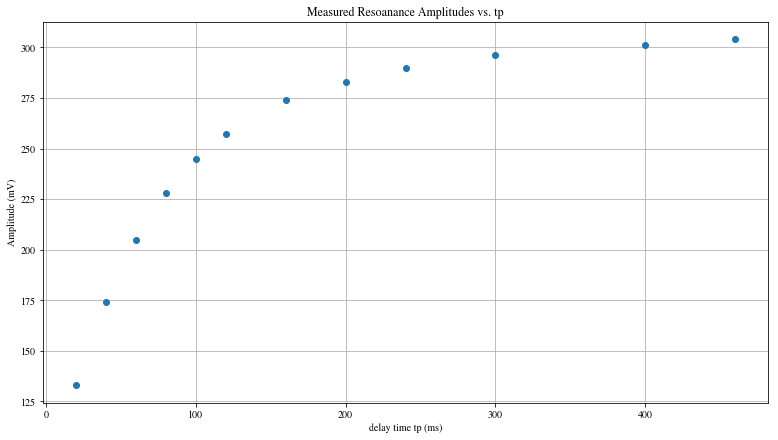

In [41]:
tp = np.array([20, 40, 60, 80, 100, 120, 
               160, 200, 240, 300, 400, 460])
signal = np.array([133, 174, 205, 228, 245, 
                   257, 274, 283, 290, 296, 301, 304])

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(tp, signal, 'o')

ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Measured Resoanance Amplitudes vs. tp') 
ax.grid(True)

plt.show()

array([290.93148352,  46.74470962])

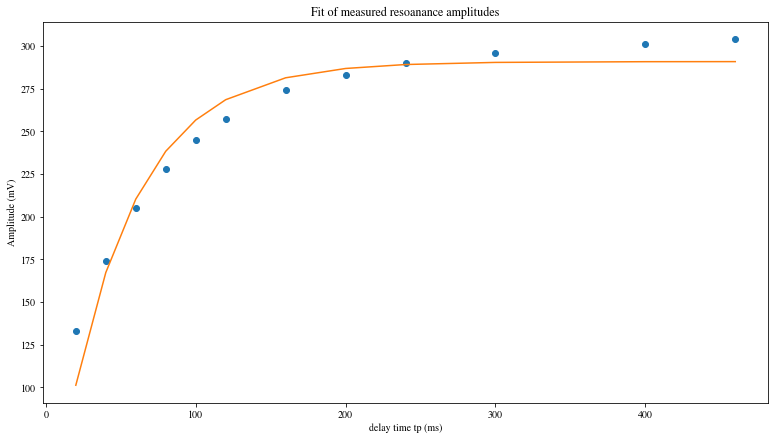

In [42]:
# Function we are interested in fitting
def mz(t, m0, t1):
    """Function (9) as defined in the lab notebook."""
    return m0 * (1 - np.exp(-t/t1))

# Fitting and plotting the results
popt, pcov = curve_fit(mz, tp, signal, p0=[1, 1])

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Fit of measured resoanance amplitudes') 
ax.plot(tp, signal, 'o')
ax.plot(tp, mz(tp, *popt))
popt

### 3.3 A - Inversion recovery method (IRM)
Next we examine $T_1$ by using the inversion-recovery method, starting with a pulse of $180^{\circ}$ to flip the z-magnetization, waiting for $\tau$, then applying a $90^{\circ}$ pulse and measuring the amplitude.  Fitting the decay envelope to an exponential allows us to extract $T_1$.

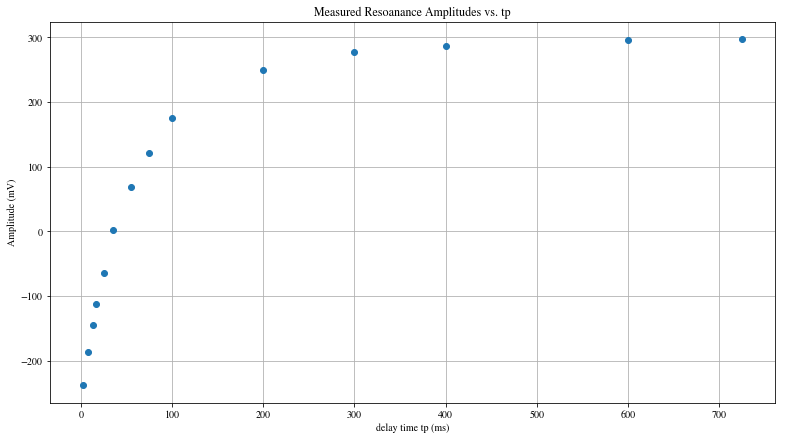

In [43]:
τ = np.array([0.725, 0.6, 0.4, 0.3, 0.2, 0.1, 
              0.075, 0.055, 0.0353, 0.025, 
              0.017, 0.0128, 0.0076, 0.002])
signal = np.array([297, 296, 287, 278, 250, 
                   175, 121, 69, 2.65, -64, 
                   -113, -145, -186, -238])

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(τ * 1000, signal, 'o')

ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Measured Resoanance Amplitudes vs. tp') 
ax.grid(True)

plt.show()

array([2.72964887e+02, 5.36786988e-02])

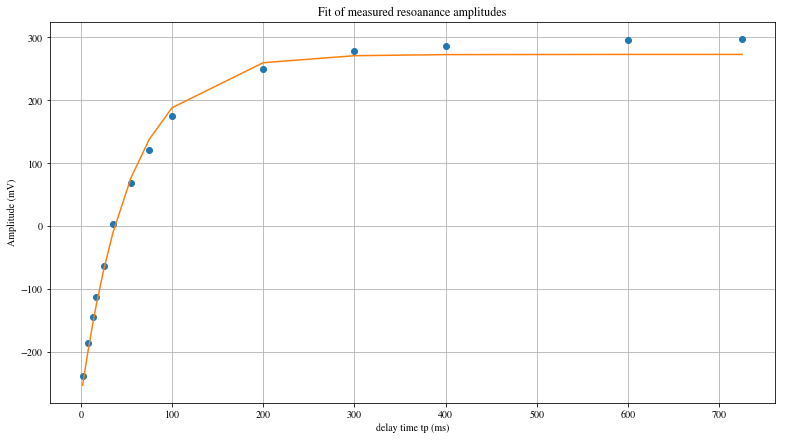

In [44]:
def mzirm(t, m0, t1):
    """Function (9) as defined in the lab notebook."""
    return m0 * (1 - 2 * np.exp(-t/t1))

# Fitting and plotting the results
popt, pcov = curve_fit(mzirm, τ, signal)

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Fit of measured resoanance amplitudes') 
ax.plot(τ * 1000, signal, 'o')
ax.plot(τ * 1000, mzirm(τ, *popt))
ax.grid(True)
popt

The fit results look strong. Using the fit values we get $T_1 \approx 53.4 ms$. 

### 3.3 B

To measure $T_2$ we used the spin-echo method, starting with a pulse of $90^{\circ}$, waiting for $\tau$, then applying a $180^{\circ}$ pulse and measuring the amplitude. 

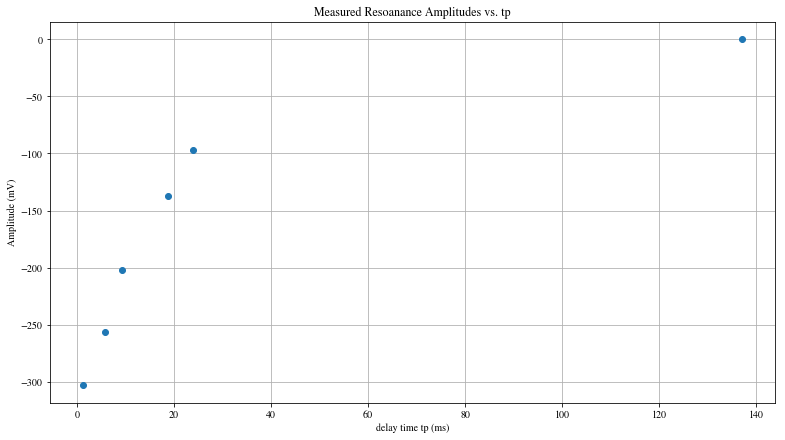

In [45]:
τ = np.array([0.0012, 0.0057, 0.0093, 0.0188, 0.024, 0.1371])
signal = np.array([-303, -256, -202, -137, -97, 0])

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(τ * 1000, signal, 'o')

ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Measured Resoanance Amplitudes vs. tp') 
ax.grid(True)

plt.show()

array([-3.25009339e+02,  2.07891789e-02])

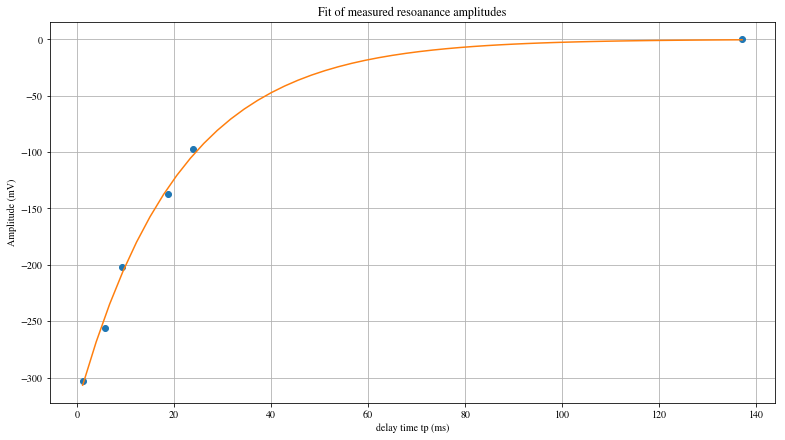

In [46]:
# Function we are interested in fitting
def mxy(t, m0, t2):
    """Function (9) as defined in the lab notebook."""
    return m0 * np.exp(-t/t2)

# Fitting and plotting the results
popt, pcov = curve_fit(mxy, τ, signal, p0=[0, 500])

# Plot results
x = np.linspace(np.min(τ), np.max(τ), 50)

fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel('delay time tp (ms)')
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Fit of measured resoanance amplitudes') 
ax.plot(τ * 1000, signal, 'o')
ax.plot(x * 1000, mxy(x, *popt))
ax.grid(True)
popt

The fit seems reasonable and the resulting value $T_2 = 20.8 ms$.

### 3.3 C

Once again we measure $T_2$ but using the improved version of the the above method, developed by Meiboom and Gill, starting with a pulse of $90^{\circ}$ followed by $N$ $180^{\circ}$ pulses in the interval of $\tau$.


The first data set we examine have the following parameters:

| Var  | value             |
|--------|-----------------|
| Num B  | 4               |
| $\tau$ | -0.0005 seconds |
| P      | 5.5 seconds     |

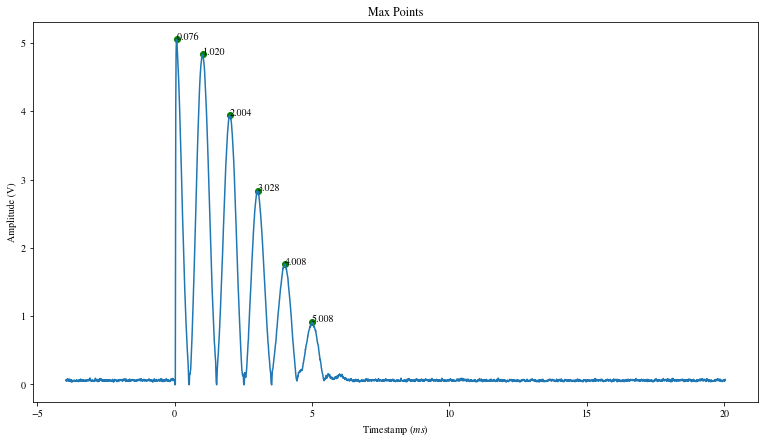

In [47]:
# number of points to be checked before and after 
n=50 

# Find local peaks
max = data2.iloc[argrelextrema(data2['ch2'].values, 
                               np.greater_equal, order=n)]

# Dropping peaks outside of range
max = max[max['ch2'].between(0.5, 10)]

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.scatter(data2['time'].iloc[max.index.values] * 1000, 
           data2['ch2'].iloc[max.index.values], c='g')
ax.plot(data2['time'] * 1000, data2['ch2'])

# Add labels to points
for i in max.index.values:
    ax.annotate(format(data2['time'][i] * 1000, '.3f'), 
                (data2['time'][i] * 1000, data2['ch2'][i]))
plt.show()

In [48]:
print('Table of peaks for the first 6 peaks:')
max

Table of peaks for the first 6 peaks:


,time,ch2,ch3
1008,0.000076,5.051170,0.335820
1244,0.001020,4.834770,-0.297117
1490,0.002004,3.941800,0.289570
1746,0.003028,2.832420,-0.156555
1991,0.004008,1.758980,0.133070
2241,0.005008,0.916016,-0.071695


Now we can fit the above values to the $m$ function. 

array([5.68023632e+00, 3.89316873e-03])

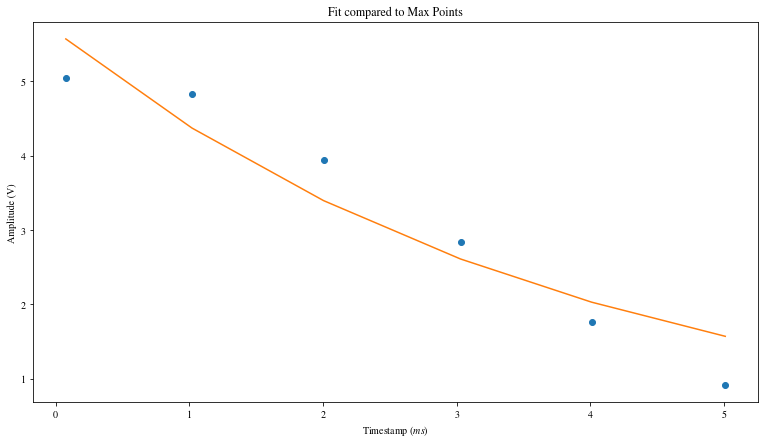

In [49]:
# Fitting and plotting the results
popt, pcov = curve_fit(mxy, max['time'], 
                       max['ch2'], p0=[0, 1000])

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Fit compared to Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.plot(max['time'] * 1000, max['ch2'], 'o')
ax.plot(max['time'] * 1000, mxy(max['time'], *popt))
popt

Above we can see that $M_0$ and $T_2$ are -5.60386668, 0.01000225.

Retaking the data with N = 60

| Var  | value             |
|--------|-----------------|
| Num B  | 60              |
| $\tau$ | -0.0005 seconds |
| P      | 5.5 seconds     |

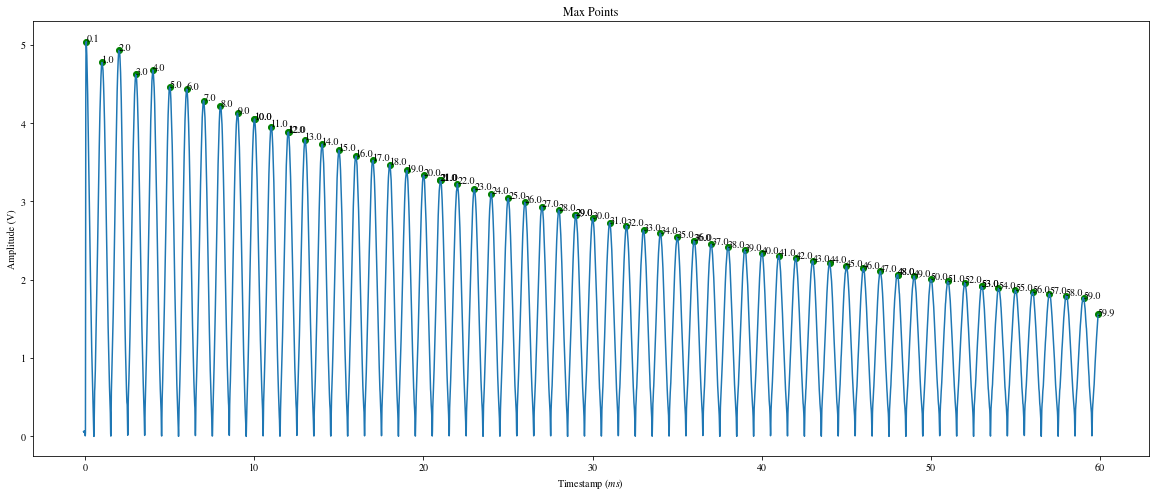

In [50]:
# number of points to be checked before and after 
n=50 

# Find local peaks
max = data3.iloc[argrelextrema(data3['ch2'].values, 
                               np.greater_equal, order=n)]

# Dropping peaks outside of range
max = max[max['ch2'].between(0.5, 10)]

# Plot results
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.scatter(data3['time'].iloc[max.index.values] * 1000, 
           data3['ch2'].iloc[max.index.values], c='g')
ax.plot(data3['time'] * 1000, data3['ch2'])

# Add labels to points
for i in max.index.values:
    ax.annotate(format(data3['time'][i] * 1000, '.1f'), 
                (data3['time'][i] * 1000, data3['ch2'][i]))
plt.show()

In [51]:
print('Table of peaks for the first 10 peaks:')
max.head(10)

Table of peaks for the first 10 peaks:


,time,ch2,ch3
16,0.000073,5.04180,0.333086
108,0.001001,4.77539,0.298461
208,0.002009,4.93164,0.347742
306,0.002997,4.62305,0.298820
406,0.004005,4.67852,0.315164
505,0.005002,4.46289,0.292164
604,0.006000,4.43242,0.287930
705,0.007018,4.28711,0.278523
803,0.008006,4.21289,0.266617
903,0.009014,4.12773,0.267398


array([4.87706146, 0.05484843])

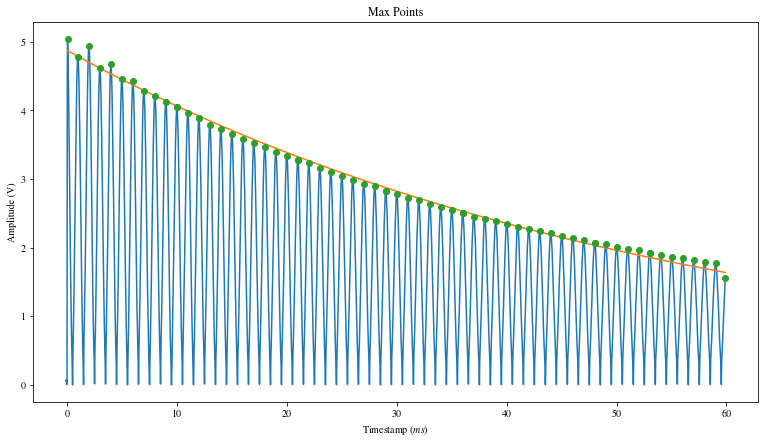

In [52]:
# Fitting and plotting the results
popt, pcov = curve_fit(mxy, max['time'], 
                       max['ch2'], p0=[0, 1000])

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.plot(data3['time'] * 1000, data3['ch2'])
ax.plot(max['time'] * 1000, mxy(max['time'], *popt))
ax.plot(max['time'] * 1000, max['ch2'], 'o')
popt

Above we can see that $M_0$ and $T_2$ are 4.87706146, 0.05484843.

Retaking the data with N = 20

| Var  | value             |
|--------|-----------------|
| Num B  | 20              |
| $\tau$ | -0.0005 seconds |
| P      | 5.5 seconds     |

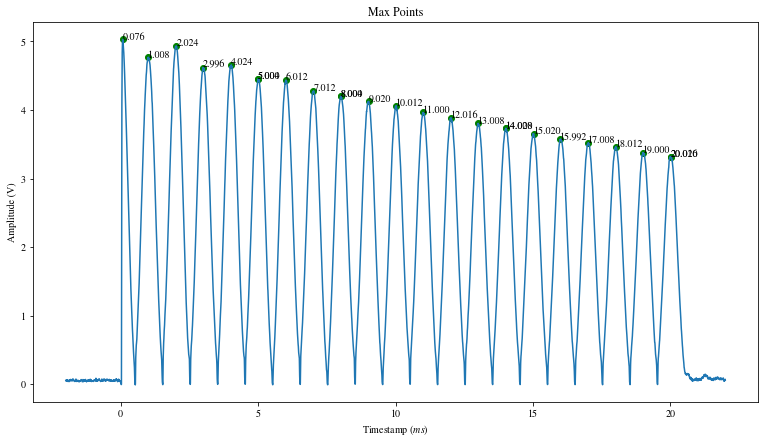

In [53]:
# number of points to be checked before and after 
n=50 

# Find local peaks
max = data4.iloc[argrelextrema(data4['ch2'].values, 
                               np.greater_equal, order=n)]

# Dropping peaks outside of range
max = max[max['ch2'].between(0.5, 10)]

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.scatter(data4['time'].iloc[max.index.values] * 1000, 
           data4['ch2'].iloc[max.index.values], c='g')
ax.plot(data4['time'] * 1000, data4['ch2'])

# Add labels to points
for i in max.index.values:
    ax.annotate(format(data4['time'][i] * 1000, '.3f'), 
                (data4['time'][i] * 1000, data4['ch2'][i]))
plt.show()

In [54]:
print('Table of peaks for the first 10 peaks:')
max.head(10)

Table of peaks for the first 10 peaks:


,time,ch2,ch3
518,0.000076,5.02930,0.332633
751,0.001008,4.76914,0.296539
1005,0.002024,4.93242,0.343273
1248,0.002996,4.61914,0.298273
1505,0.004024,4.65898,0.306539
1749,0.005000,4.45664,0.294508
1750,0.005004,4.45664,0.293336
2002,0.006012,4.43633,0.284289
2252,0.007012,4.27930,0.281055
2499,0.008000,4.19961,0.269648


array([4.98093363, 0.04869344])

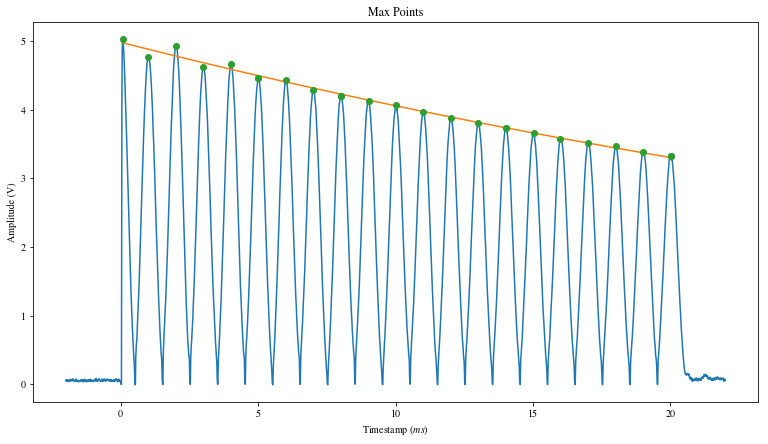

In [55]:
# Fitting and plotting the results
popt, pcov = curve_fit(mxy, max['time'], max['ch2'], p0=[0, 1000])

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points') 
ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.plot(data4['time'] * 1000, data4['ch2'])
ax.plot(max['time'] * 1000, mxy(max['time'], *popt))
ax.plot(max['time'] * 1000, max['ch2'], 'o')
popt

Above we can see that $M_0$ and $T_2$ are 4.98093363, 0.04869344

### 3.4 Chemical shift of fluorine

We used the FC-70 sample to examine the chemical shift. Below is the measured signal from the sample. 

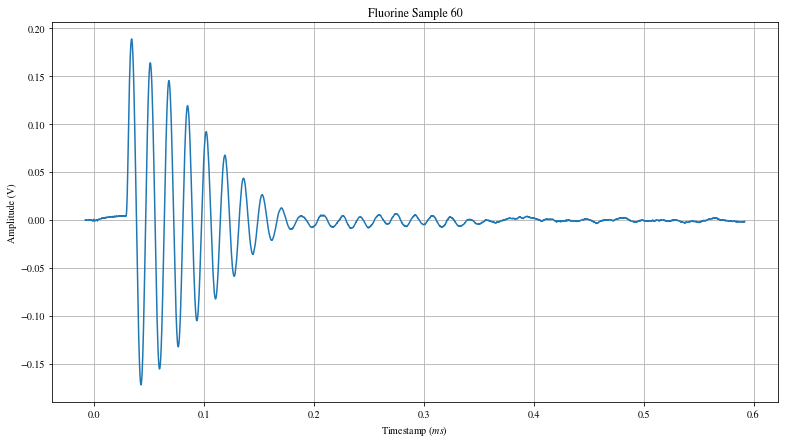

In [56]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(data5['time'].values * 1000, data5['ch3'].values)

ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.set_title('Fluorine Sample 60') 
ax.grid(True)

plt.show()

The sample has several atomic configurations of $F^(19)$. We can examine this by looking at the FFT of the data. The data points are uniformly distributed so no interpolation is required. 

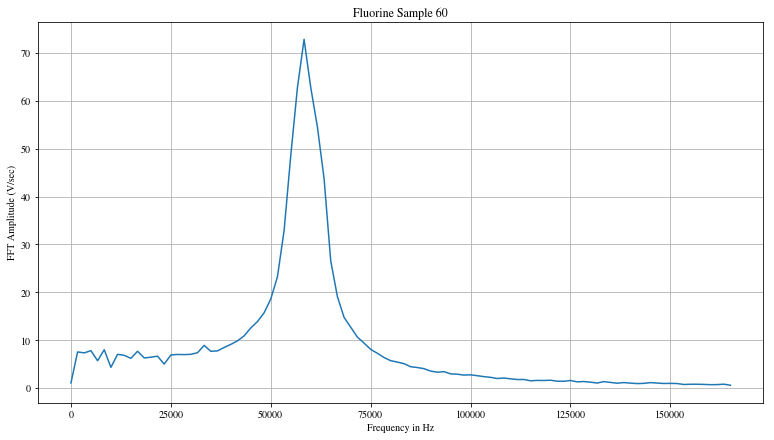

With a max value of: 58.3430571761956khz


In [57]:
dt = data5['time'].values[1]-data5['time'].values[0]
N = data5['time'].shape[0]
yf = np.abs(np.fft.fft(data5['ch3'].values))
xf = np.fft.fftfreq(N, d=dt)

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(xf[0:100], yf[0:100])
ax.set_xlabel('Frequency in Hz')
ax.set_ylabel('FFT Amplitude (V/sec)')
ax.set_title('Fluorine Sample 60') 
ax.grid(True)

plt.show()

m = xf[np.argmax(yf[0:100])]
print(f'With a max value of: {m / 1000}khz')

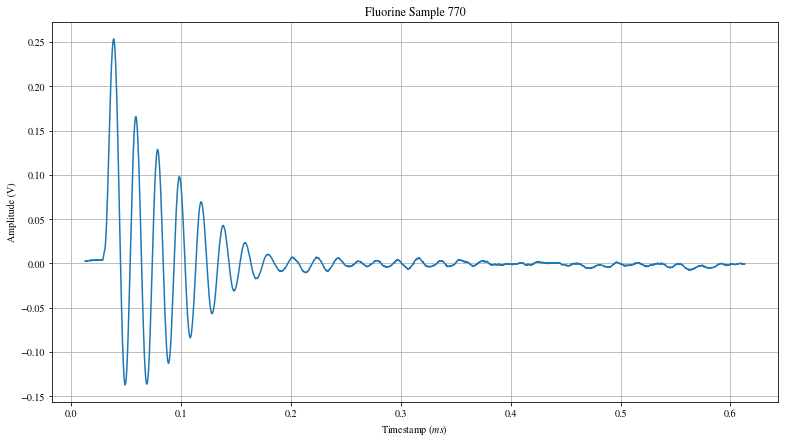

In [58]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(data6['time'].values * 1000, data6['ch3'].values)

ax.set_xlabel('Timestamp ($ms$)')
ax.set_ylabel('Amplitude (V)')
ax.set_title('Fluorine Sample 770') 
ax.grid(True)

plt.show()

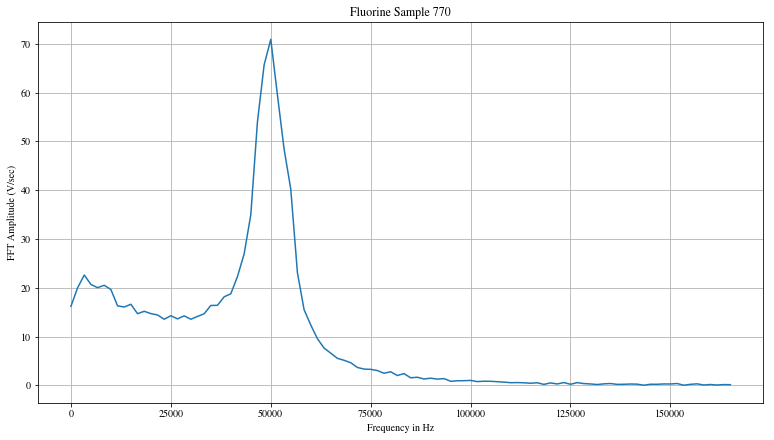

With a max value of: 50.00833472245337khz


In [59]:
dt = data6['time'].values[1]-data6['time'].values[0]
N = data6['time'].shape[0]
yf = np.abs(np.fft.fft(data6['ch3'].values))
xf = np.fft.fftfreq(N, d=dt)

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(xf[0:100], yf[0:100])
ax.set_xlabel('Frequency in Hz')
ax.set_ylabel('FFT Amplitude (V/sec)')
ax.set_title('Fluorine Sample 770') 
ax.grid(True)

plt.show()

m = xf[np.argmax(yf[0:100])]
print(f'With a max value of: {m / 1000}khz')

# Conclusion
***
It appears that the first single pulse method wasn't successful. The data set doesn't seem to fit the expected analytical form. We did have better luck with the IRM where we measured $T_1 \approx 54 ms$. Using the spin-echo method we managed to measure the $T_2 \approx 20.8 ms$. 

Using the multipulse methods, once again we measure $T_2$ but using the improved version of the the above method, developed by Meiboom and Gill. There seemed to be a trend, that the measurements with fewer repetitions produced lower values for $T_2$. The values converged around $50ms$ for $T_2$, which is higher than what we measured using the spin-echo method. 

Finally with the chemical shift of fluorine we found a resonance peak at $58.3$khz for FC-60 and $50$khz for FC-770. 

## References
***
[1] NMR Lab Book